In [1]:
from tpot import TPOTClassifier
from sklearn.cross_validation import train_test_split
import pandas as pd 
import numpy as np

/home/fd/Dev/siraj/dschallenges/.env/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#load the data
global_temperatures = pd.read_csv('GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv')

In [3]:
#clean the data
argentina_temperatures = global_temperatures[global_temperatures['Country']=='Argentina']
argentina_temperatures_shuffled = argentina_temperatures.iloc[np.random.permutation(len(argentina_temperatures))]
arg = argentina_temperatures_shuffled.reset_index(drop=True)

In [4]:
from datetime import date, datetime
arr = np.asarray(argentina_temperatures[['dt']]).reshape(len(argentina_temperatures))
last_date = datetime.strptime(arr[0], '%Y-%m-%d').date()
date_numbers = [(
    datetime.strptime(d, '%Y-%m-%d').date().year,
) for d in arr]
argentina_temperatures[['dt']] = np.asarray(date_numbers)

/home/fd/Dev/siraj/dschallenges/.env/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/fd/Dev/siraj/dschallenges/.env/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


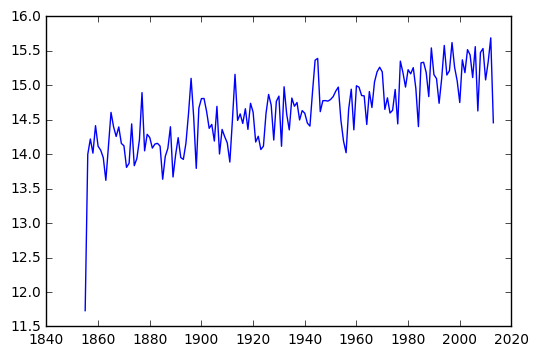

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

X = argentina_temperatures.groupby('dt')['AverageTemperature'].mean().index
Y = argentina_temperatures.groupby('dt')['AverageTemperature'].mean().values
plt.plot(X,Y)


In [111]:
#Split training, testing, and validation data
X = np.asarray(X).reshape(X.shape[0], 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [123]:
#Let Genetic Programming find best ML model and hyperparameters
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=100, verbosity=2)

tpot.fit(X_train, y_train)

#Score the accuracy
tpot.score(X_test, y_test)

Optimization Progress:   1%|          | 113/10100 [01:23<1:34:51,  1.75pipeline/s]

Generation 1 - Current best internal CV score: 0.09229965129703943


Optimization Progress:   2%|▏         | 190/10100 [01:40<49:37,  3.33pipeline/s]  

Generation 2 - Current best internal CV score: 0.09229965129703943


Optimization Progress:   3%|▎         | 290/10100 [01:52<35:26,  4.61pipeline/s]

Generation 3 - Current best internal CV score: 0.08983878296848465


Optimization Progress:   4%|▍         | 400/10100 [01:59<05:50, 27.66pipeline/s]

Generation 4 - Current best internal CV score: 0.08983878296848465


Optimization Progress:   5%|▍         | 500/10100 [02:15<22:52,  7.00pipeline/s]

Generation 5 - Current best internal CV score: 0.08983878296848465


Optimization Progress:   6%|▌         | 592/10100 [02:28<14:16, 11.10pipeline/s]

Generation 6 - Current best internal CV score: 0.08972997523134767


Optimization Progress:   7%|▋         | 691/10100 [02:51<1:01:17,  2.56pipeline/s]

Generation 7 - Current best internal CV score: 0.08972997523134767


Optimization Progress:   8%|▊         | 790/10100 [03:11<1:09:29,  2.23pipeline/s]

Generation 8 - Current best internal CV score: 0.08972997523134767


Optimization Progress:   9%|▉         | 894/10100 [03:30<1:24:23,  1.82pipeline/s]

Generation 9 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  10%|▉         | 1001/10100 [03:45<11:17, 13.44pipeline/s] 

Generation 10 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  11%|█         | 1102/10100 [03:54<11:52, 12.62pipeline/s]

Generation 11 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  12%|█▏        | 1201/10100 [04:05<15:25,  9.62pipeline/s]  

Generation 12 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  13%|█▎        | 1308/10100 [04:18<21:37,  6.77pipeline/s]

Generation 13 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  14%|█▍        | 1401/10100 [04:34<28:17,  5.13pipeline/s]  

Generation 14 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  15%|█▍        | 1487/10100 [04:41<15:30,  9.26pipeline/s]

Generation 15 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  16%|█▌        | 1609/10100 [04:48<06:06, 23.14pipeline/s]

Generation 16 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  17%|█▋        | 1691/10100 [04:56<17:43,  7.91pipeline/s]

Generation 17 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  18%|█▊        | 1806/10100 [05:12<17:48,  7.76pipeline/s]

Generation 18 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  19%|█▉        | 1901/10100 [05:22<13:54,  9.82pipeline/s]

Generation 19 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  20%|█▉        | 2013/10100 [05:25<03:38, 36.97pipeline/s]

Generation 20 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  21%|██        | 2087/10100 [05:32<13:11, 10.12pipeline/s]

Generation 21 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  22%|██▏       | 2214/10100 [05:44<09:36, 13.69pipeline/s]

Generation 22 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  23%|██▎       | 2307/10100 [05:47<05:33, 23.39pipeline/s]

Generation 23 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  24%|██▍       | 2401/10100 [05:52<04:56, 25.93pipeline/s]          

Generation 24 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  25%|██▍       | 2489/10100 [05:55<03:24, 37.29pipeline/s]

Generation 25 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  26%|██▌       | 2586/10100 [06:05<05:26, 23.04pipeline/s]

Generation 26 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  27%|██▋       | 2701/10100 [06:17<15:56,  7.73pipeline/s]

Generation 27 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  28%|██▊       | 2808/10100 [06:31<16:16,  7.47pipeline/s]

Generation 28 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  29%|██▊       | 2891/10100 [06:37<08:40, 13.85pipeline/s]

Generation 29 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  30%|██▉       | 3001/10100 [06:43<06:28, 18.29pipeline/s]

Generation 30 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  31%|███       | 3090/10100 [06:53<12:27,  9.37pipeline/s]

Generation 31 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  32%|███▏      | 3215/10100 [07:10<17:50,  6.43pipeline/s]

Generation 32 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  33%|███▎      | 3305/10100 [07:23<23:53,  4.74pipeline/s]

Generation 33 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  34%|███▎      | 3388/10100 [07:25<04:42, 23.78pipeline/s]

Generation 34 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  35%|███▍      | 3501/10100 [07:36<10:12, 10.77pipeline/s]

Generation 35 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  36%|███▌      | 3591/10100 [07:50<23:43,  4.57pipeline/s]

Generation 36 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  37%|███▋      | 3701/10100 [07:55<06:43, 15.86pipeline/s]

Generation 37 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  38%|███▊      | 3800/10100 [08:00<03:23, 30.98pipeline/s]

Generation 38 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  39%|███▊      | 3891/10100 [08:10<15:43,  6.58pipeline/s]

Generation 39 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  40%|███▉      | 3991/10100 [08:27<24:21,  4.18pipeline/s]

Generation 40 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  41%|████      | 4110/10100 [08:46<21:46,  4.58pipeline/s]

Generation 41 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  42%|████▏     | 4195/10100 [08:57<23:25,  4.20pipeline/s]

Generation 42 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  43%|████▎     | 4301/10100 [09:03<05:27, 17.68pipeline/s]

Generation 43 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  44%|████▎     | 4409/10100 [09:24<34:28,  2.75pipeline/s]

Generation 44 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  45%|████▍     | 4510/10100 [09:35<07:17, 12.78pipeline/s]

Generation 45 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  46%|████▌     | 4608/10100 [09:41<06:14, 14.67pipeline/s]

Generation 46 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  46%|████▋     | 4688/10100 [09:55<14:48,  6.09pipeline/s]

Generation 47 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  48%|████▊     | 4805/10100 [10:06<11:41,  7.55pipeline/s]

Generation 48 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  48%|████▊     | 4892/10100 [10:22<22:08,  3.92pipeline/s]

Generation 49 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  50%|████▉     | 5011/10100 [10:31<06:04, 13.95pipeline/s]

Generation 50 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  50%|█████     | 5090/10100 [10:42<06:39, 12.53pipeline/s]

Generation 51 - Current best internal CV score: 0.08972997523134767


Optimization Progress:  51%|█████▏    | 5201/10100 [10:59<21:23,  3.82pipeline/s]

Generation 52 - Current best internal CV score: 0.08749770526661316


Optimization Progress:  52%|█████▏    | 5287/10100 [11:26<1:19:32,  1.01pipeline/s]

Generation 53 - Current best internal CV score: 0.08743790174285725


Optimization Progress:  53%|█████▎    | 5391/10100 [11:37<13:01,  6.03pipeline/s]  

Generation 54 - Current best internal CV score: 0.08743790174285725


Optimization Progress:  54%|█████▍    | 5494/10100 [11:55<23:29,  3.27pipeline/s]  

Generation 55 - Current best internal CV score: 0.08743790174285725


Optimization Progress:  55%|█████▌    | 5594/10100 [12:23<34:21,  2.19pipeline/s]

Generation 56 - Current best internal CV score: 0.08743790174285725


Optimization Progress:  56%|█████▋    | 5689/10100 [12:52<45:03,  1.63pipeline/s]

Generation 57 - Current best internal CV score: 0.08743790174285725


Optimization Progress:  57%|█████▋    | 5787/10100 [13:19<1:06:34,  1.08pipeline/s]

Generation 58 - Current best internal CV score: 0.08743790174285725


Optimization Progress:  58%|█████▊    | 5891/10100 [13:40<24:05,  2.91pipeline/s]  

Generation 59 - Current best internal CV score: 0.08743790174285725


Optimization Progress:  59%|█████▉    | 5993/10100 [14:13<47:41,  1.44pipeline/s]  

Generation 60 - Current best internal CV score: 0.08743790174285725


Optimization Progress:  60%|██████    | 6088/10100 [14:39<47:24,  1.41pipeline/s]

Generation 61 - Current best internal CV score: 0.08708064350144794


Optimization Progress:  61%|██████▏   | 6187/10100 [15:15<43:05,  1.51pipeline/s]  

Generation 62 - Current best internal CV score: 0.08692635338275566


Optimization Progress:  62%|██████▏   | 6297/10100 [16:01<1:36:40,  1.53s/pipeline]

Generation 63 - Current best internal CV score: 0.08678178428650807


Optimization Progress:  63%|██████▎   | 6394/10100 [16:25<23:52,  2.59pipeline/s]  

Generation 64 - Current best internal CV score: 0.08678178428650807


Optimization Progress:  64%|██████▍   | 6491/10100 [16:59<34:49,  1.73pipeline/s]

Generation 65 - Current best internal CV score: 0.08668949821290488


Optimization Progress:  65%|██████▌   | 6596/10100 [17:11<09:07,  6.40pipeline/s]

Generation 66 - Current best internal CV score: 0.08668949821290488


Optimization Progress:  66%|██████▋   | 6694/10100 [17:24<10:51,  5.23pipeline/s]

Generation 67 - Current best internal CV score: 0.08668949821290488


Optimization Progress:  67%|██████▋   | 6800/10100 [17:42<16:41,  3.29pipeline/s]

Generation 68 - Current best internal CV score: 0.0866034278672212


Optimization Progress:  68%|██████▊   | 6892/10100 [18:08<21:57,  2.44pipeline/s]

Generation 69 - Current best internal CV score: 0.0866034278672212


Optimization Progress:  69%|██████▉   | 6992/10100 [18:33<17:51,  2.90pipeline/s]

Generation 70 - Current best internal CV score: 0.0866034278672212


Optimization Progress:  70%|███████   | 7103/10100 [19:22<37:06,  1.35pipeline/s]  

Generation 71 - Current best internal CV score: 0.08628018875572574


Optimization Progress:  71%|███████▏  | 7201/10100 [20:01<26:39,  1.81pipeline/s]  

Generation 72 - Current best internal CV score: 0.08628018875572574


Optimization Progress:  72%|███████▏  | 7290/10100 [20:57<1:13:53,  1.58s/pipeline]

Generation 73 - Current best internal CV score: 0.08614630263256136


Optimization Progress:  73%|███████▎  | 7401/10100 [21:35<26:07,  1.72pipeline/s]  

Generation 74 - Current best internal CV score: 0.08614630263256136


Optimization Progress:  74%|███████▍  | 7485/10100 [22:07<38:50,  1.12pipeline/s]

Generation 75 - Current best internal CV score: 0.08614630263256136


Optimization Progress:  75%|███████▌  | 7615/10100 [22:50<08:24,  4.93pipeline/s]  

Generation 76 - Current best internal CV score: 0.08614630263256134


Optimization Progress:  76%|███████▌  | 7691/10100 [23:03<04:53,  8.22pipeline/s]

Generation 77 - Current best internal CV score: 0.08614630263256134


Optimization Progress:  77%|███████▋  | 7801/10100 [23:46<28:54,  1.33pipeline/s]

Generation 78 - Current best internal CV score: 0.08614630263256134


Optimization Progress:  78%|███████▊  | 7894/10100 [24:18<18:39,  1.97pipeline/s]

Generation 79 - Current best internal CV score: 0.08614630263256134


Optimization Progress:  79%|███████▉  | 7992/10100 [24:59<16:38,  2.11pipeline/s]

Generation 80 - Current best internal CV score: 0.08614630263256134


Optimization Progress:  80%|████████  | 8086/10100 [25:26<18:53,  1.78pipeline/s]

Generation 81 - Current best internal CV score: 0.08614630263256129


Optimization Progress:  81%|████████  | 8193/10100 [26:09<39:28,  1.24s/pipeline]

Generation 82 - Current best internal CV score: 0.08614630263256129


Optimization Progress:  82%|████████▏ | 8288/10100 [27:07<34:41,  1.15s/pipeline]  

Generation 83 - Current best internal CV score: 0.08614630263256129


Optimization Progress:  83%|████████▎ | 8401/10100 [28:34<34:07,  1.21s/pipeline]  

Generation 84 - Current best internal CV score: 0.08614466770524386


Optimization Progress:  84%|████████▍ | 8501/10100 [29:06<19:12,  1.39pipeline/s]

Generation 85 - Current best internal CV score: 0.08614466770524386


Optimization Progress:  85%|████████▌ | 8591/10100 [29:51<19:25,  1.29pipeline/s]

Generation 86 - Current best internal CV score: 0.08614466770524386


Optimization Progress:  86%|████████▌ | 8691/10100 [30:41<20:28,  1.15pipeline/s]

Generation 87 - Current best internal CV score: 0.08614466770524382


Optimization Progress:  87%|████████▋ | 8796/10100 [31:15<17:00,  1.28pipeline/s]

Generation 88 - Current best internal CV score: 0.08614466770524382


Optimization Progress:  88%|████████▊ | 8901/10100 [31:38<04:02,  4.93pipeline/s]

Generation 89 - Current best internal CV score: 0.08614466770524382


Optimization Progress:  89%|████████▉ | 9001/10100 [32:28<20:42,  1.13s/pipeline]

Generation 90 - Current best internal CV score: 0.08614466770524382


Optimization Progress:  90%|█████████ | 9101/10100 [33:55<20:12,  1.21s/pipeline]

Generation 91 - Current best internal CV score: 0.08591178073404689


Optimization Progress:  91%|█████████ | 9194/10100 [34:53<25:54,  1.72s/pipeline]

Generation 92 - Current best internal CV score: 0.08591177875090028


Optimization Progress:  92%|█████████▏| 9300/10100 [36:11<21:30,  1.61s/pipeline]

Generation 93 - Current best internal CV score: 0.08591177875090028


Optimization Progress:  93%|█████████▎| 9392/10100 [39:02<10:21,  1.14pipeline/s]  

Generation 94 - Current best internal CV score: 0.08590307656042122


Optimization Progress:  94%|█████████▍| 9494/10100 [41:22<17:23,  1.72s/pipeline]  

Generation 95 - Current best internal CV score: 0.08590307656042122


Optimization Progress:  95%|█████████▌| 9601/10100 [42:36<08:45,  1.05s/pipeline]

Generation 96 - Current best internal CV score: 0.08590307656042119


Optimization Progress:  96%|█████████▌| 9690/10100 [43:34<11:32,  1.69s/pipeline]

Generation 97 - Current best internal CV score: 0.08590307656042119


Optimization Progress:  97%|█████████▋| 9793/10100 [44:54<07:57,  1.56s/pipeline]

Generation 98 - Current best internal CV score: 0.08590307656042119


Optimization Progress:  98%|█████████▊| 9891/10100 [46:37<06:21,  1.82s/pipeline]

Generation 99 - Current best internal CV score: 0.0858989935624997


Optimization Progress:  99%|█████████▉| 9994/10100 [48:10<03:21,  1.90s/pipeline]

Generation 100 - Current best internal CV score: 0.0858989935624997



Best pipeline: ElasticNet(PCA(StandardScaler(ExtraTreesRegressor(Nystroem(CombineDFs(input_matrix, PolynomialFeatures(input_matrix)), 5, 0.32000000000000001, 12), 0.90000000000000002)), 23), 0.68000000000000005, 0.001)


0.25382992235463331

In [113]:
#Export the generated code
tpot.export('pipeline3.py')

In [121]:
from sklearn.ensemble import ExtraTreesRegressor, VotingClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import FunctionTransformer

# NOTE: Make sure that the class is labeled 'class' in the data file
tpot_data = np.recfromcsv('y.csv', delimiter=',', dtype=np.float64)
features = np.delete(tpot_data.view(np.float64).reshape(tpot_data.size, -1), tpot_data.dtype.names.index('class'), axis=1)
training_features, testing_features, training_classes, testing_classes = \
    train_test_split(features, tpot_data['class'], random_state=42)

exported_pipeline = make_pipeline(
    make_union(VotingClassifier([("est", ElasticNet(alpha=0.31, l1_ratio=0.35000000000000003))]), FunctionTransformer(lambda X: X)),
    make_union(VotingClassifier([("est", ExtraTreesRegressor(max_features=0.07, n_estimators=500))]), FunctionTransformer(lambda X: X)),
    Nystroem(gamma=0.22, kernel="linear", n_components=28),
    ElasticNet(alpha=1.0, l1_ratio=1.0)
)

exported_pipeline.fit(training_features, training_classes)
results2 = exported_pipeline.predict(testing_features)

In [64]:
d={'year': X.reshape(X.shape[0]), 'class': Y}
pd.DataFrame(d).to_csv('y.csv', header=['class', 'year'], index=False)

In [108]:
# pipeline.py content
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import FunctionTransformer, Normalizer, StandardScaler
from sklearn.svm import LinearSVR
from tpot.operators.preprocessors import ZeroCount

# NOTE: Make sure that the class is labeled 'class' in the data file

tpot_data = np.recfromcsv('y.csv', delimiter=',', dtype=np.float64)

features = np.delete(tpot_data.view(np.float64).reshape(tpot_data.size, -1), tpot_data.dtype.names.index('class'), axis=1)
training_features, testing_features, training_classes, testing_classes = \
    train_test_split(features, tpot_data['class'], random_state=42)

exported_pipeline = make_pipeline(
    ZeroCount(),
    Normalizer(norm="l1"),
    StandardScaler(),
    LinearSVR(C=25.0, dual=True)
)
exported_pipeline.fit(training_features, training_classes)
results = exported_pipeline.predict(testing_features)

In [120]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testing_classes, results)

0.12658196311909586

In [122]:
mean_squared_error(testing_classes, results2)

0.083636287602099568

In [126]:
mean_squared_error(testing_classes, tpot.predict(testing_features))

0.059268612035150811

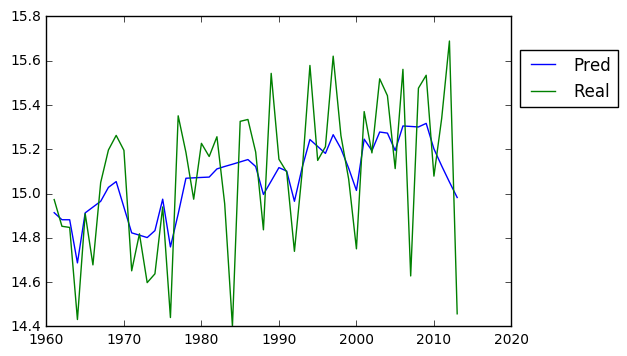

In [155]:
# split into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
ry = Y.reshape(Y.shape[0], 1)
trainX, testX = X[0:train_size,:], X[train_size:len(X),:]
trainy, testy = ry[0:train_size,:], ry[train_size:len(X),:]


pred, = plt.plot(testX, tpot.predict(testX), label='Pred')
real, = plt.plot(testX, testy, label='Real')
plt.legend(handles=[pred, real], loc='center left', bbox_to_anchor=(1, 0.8))